In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
KO_Data = pd.read_csv('/content/Coca-Cola_stock_history (1).csv')

In [11]:
KO_Data.head(5)

Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0

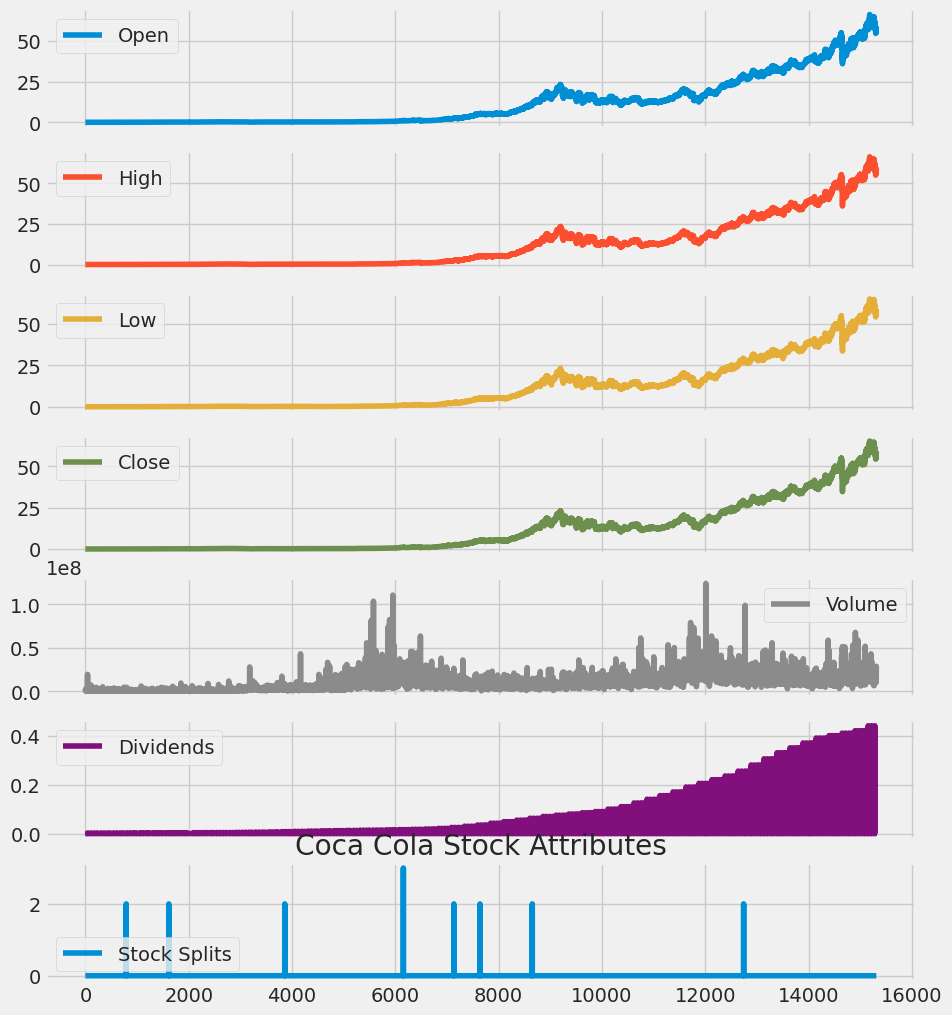

In [4]:
KO_Data.plot(subplots = True, figsize = (10,12))
plt.title('Coca Cola Stock Attributes')
plt.show()

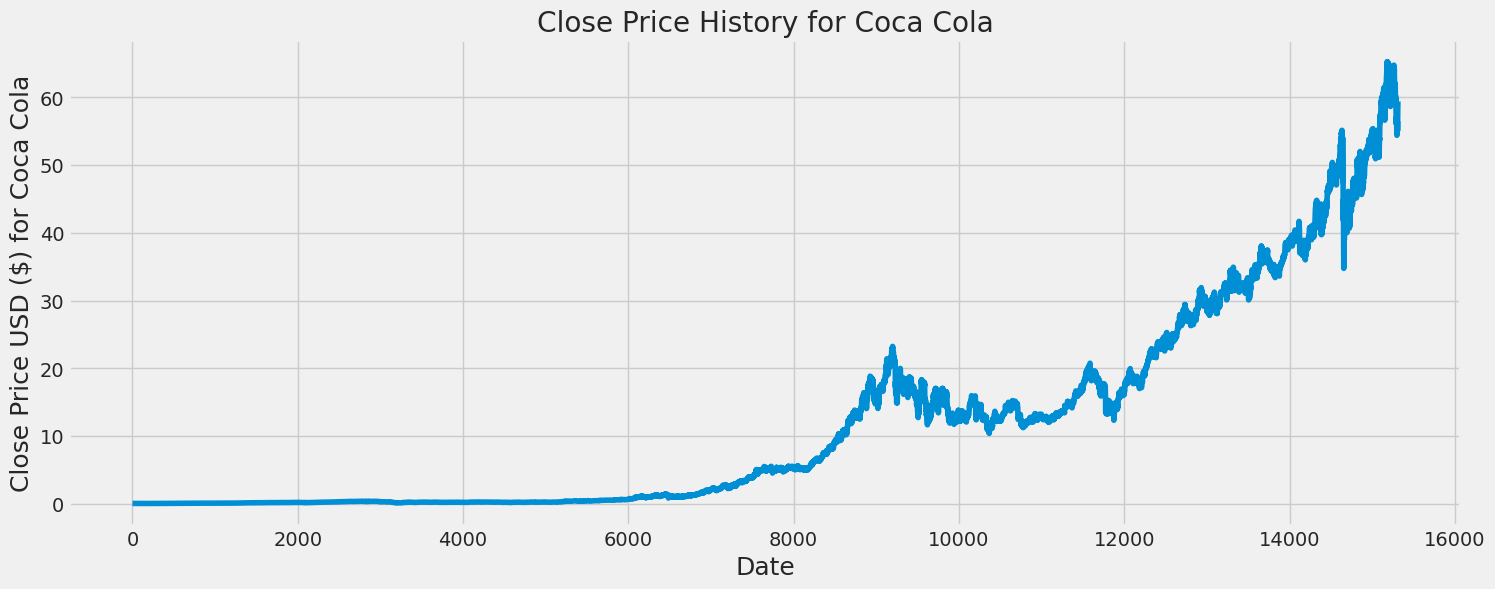

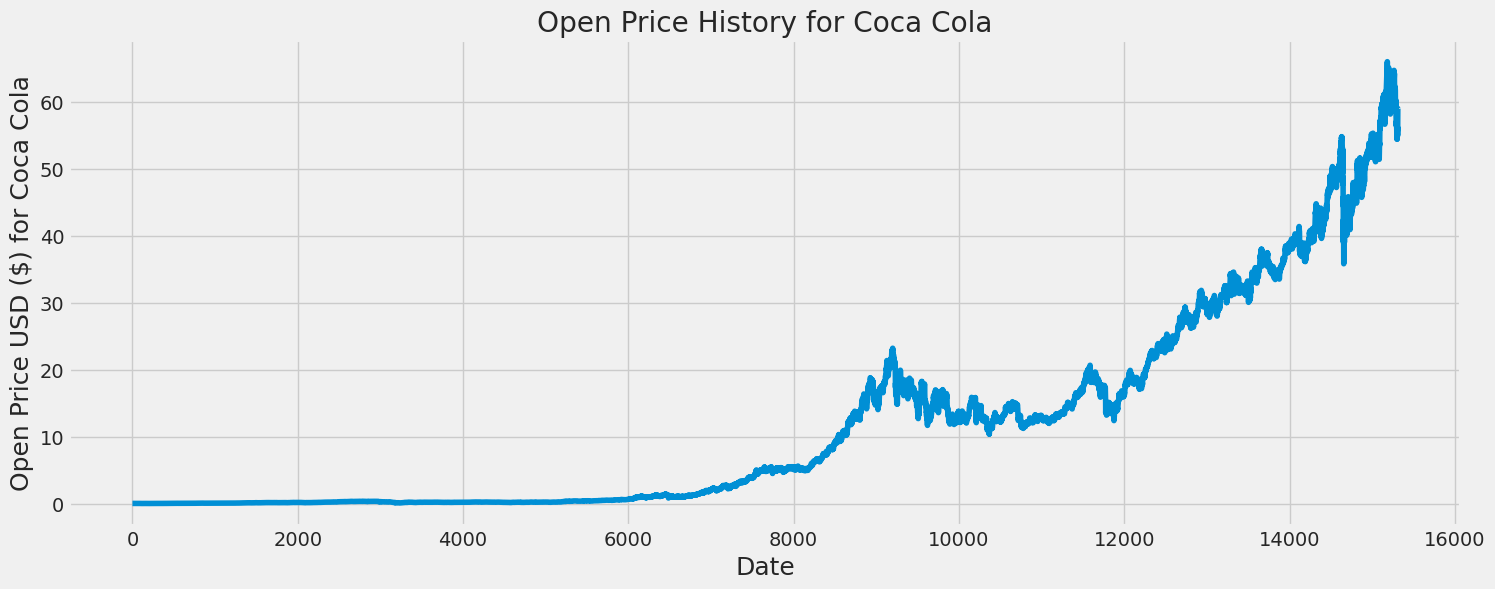

In [9]:
def plot_close_val(data_frame, column, stock):
  plt.figure(figsize=(16,6))
  plt.title(column + ' Price History for ' + stock )
  plt.plot(data_frame[column])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(column + ' Price USD ($) for ' + stock,
  fontsize=18)
  plt.show()
  #Test the function
plot_close_val(KO_Data, 'Close', 'Coca Cola')
plot_close_val(KO_Data, 'Open', 'Coca Cola')

<Axes: >

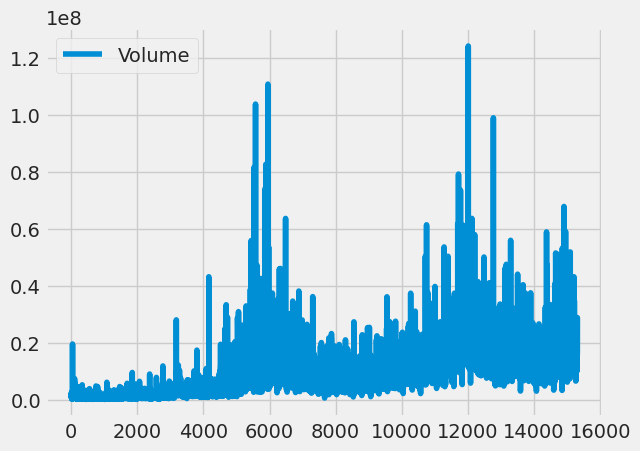

In [10]:
KO_Data[["Volume"]].plot()


In [16]:
ko_info = pd.read_csv('/content/Coca-Cola_stock_info (1).csv',
header=None,
names=(['Description','Information']))
ko_info.dropna()
ko_info.drop(ko_info.loc[ko_info['Information']=='nan'].index,
inplace=True)
ko = ko_info.sort_values('Information').style
ko


In [17]:
# Isolate the adjusted closing prices
adj_close_px = KO_Data['Close']
# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()
# Inspect the result
moving_avg[-10:]

15301    59.573229
15302    59.329031
15303    59.103823
15304    58.921440
15305    58.725320
15306    58.504966
15307    58.298918
15308    58.171838
15309    58.088689
15310    58.030935
Name: Close, dtype: float64

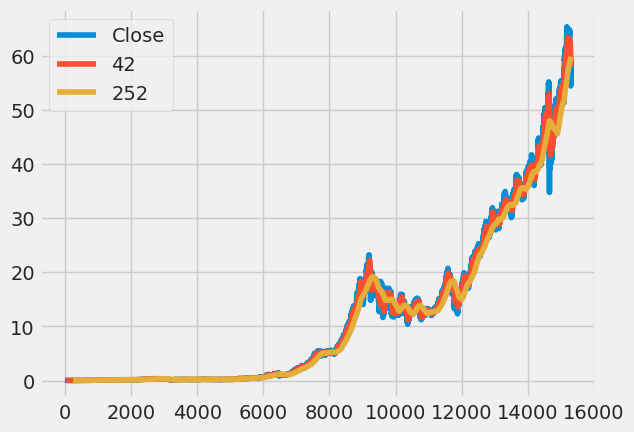

In [19]:
# Short moving window rolling mean
KO_Data['42'] = adj_close_px.rolling(window=40).mean()
# Long moving window rolling mean
KO_Data['252'] = adj_close_px.rolling(window=252).mean()
# Plot the adjusted closing price, the short and long windows of rolling means
KO_Data[['Close', '42', '252']].plot()
plt.show()

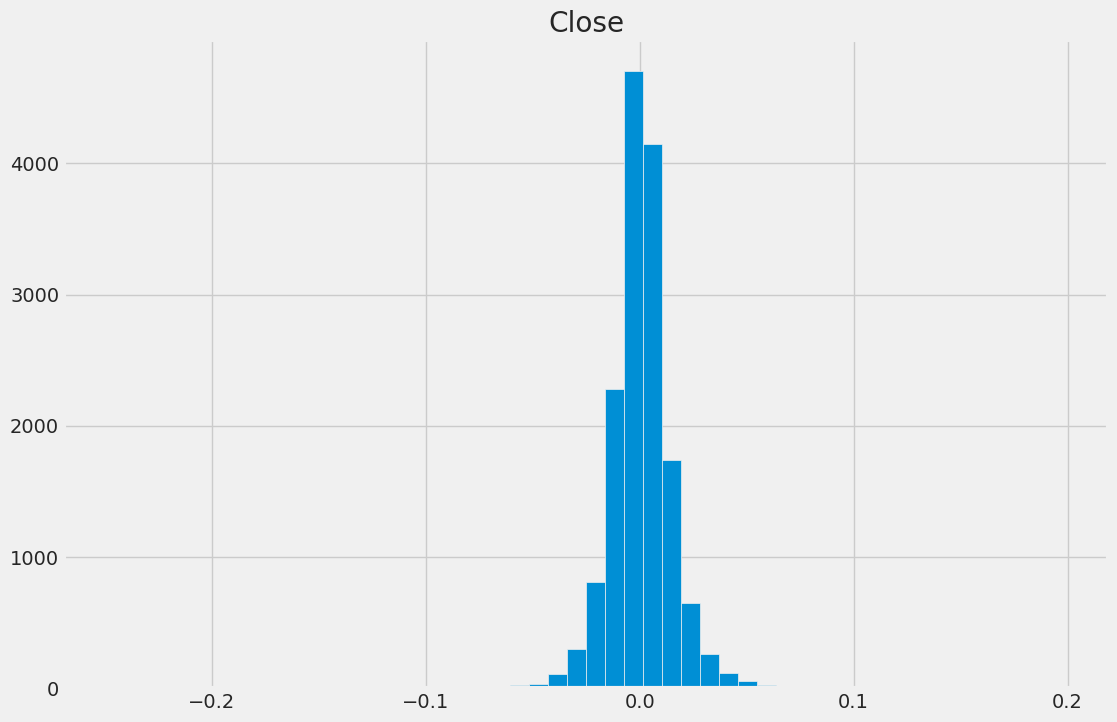

In [20]:
daily_close_px = KO_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
# Show the resulting plot
plt.show()

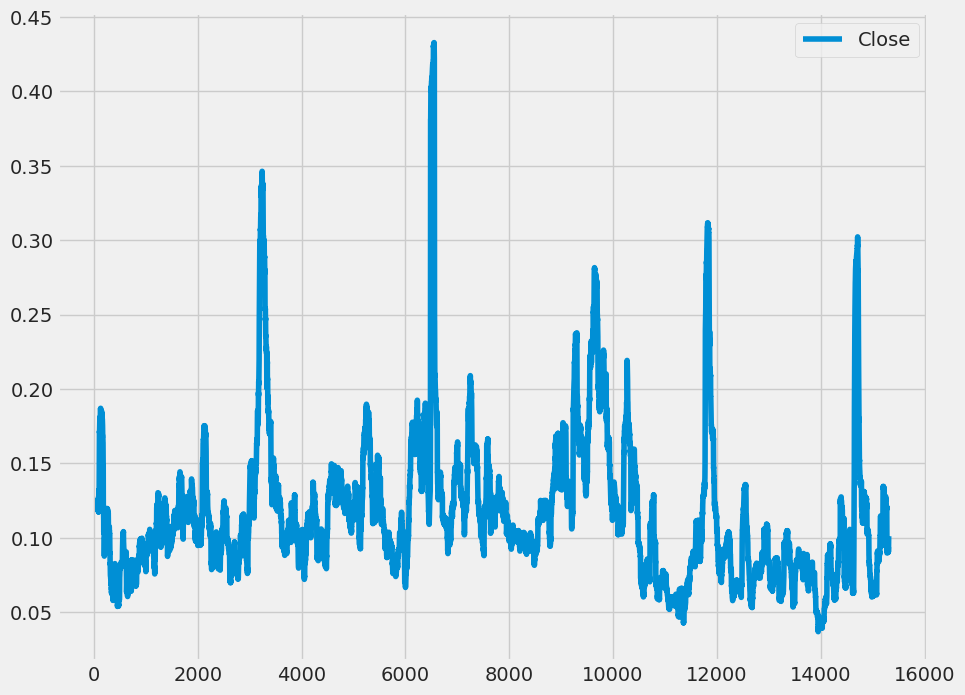

In [22]:
# Define the minumum of periods to consider
min_periods = 75
# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
# Plot the volatility
vol.plot(figsize=(10, 8))
# Show the plot
plt.show()

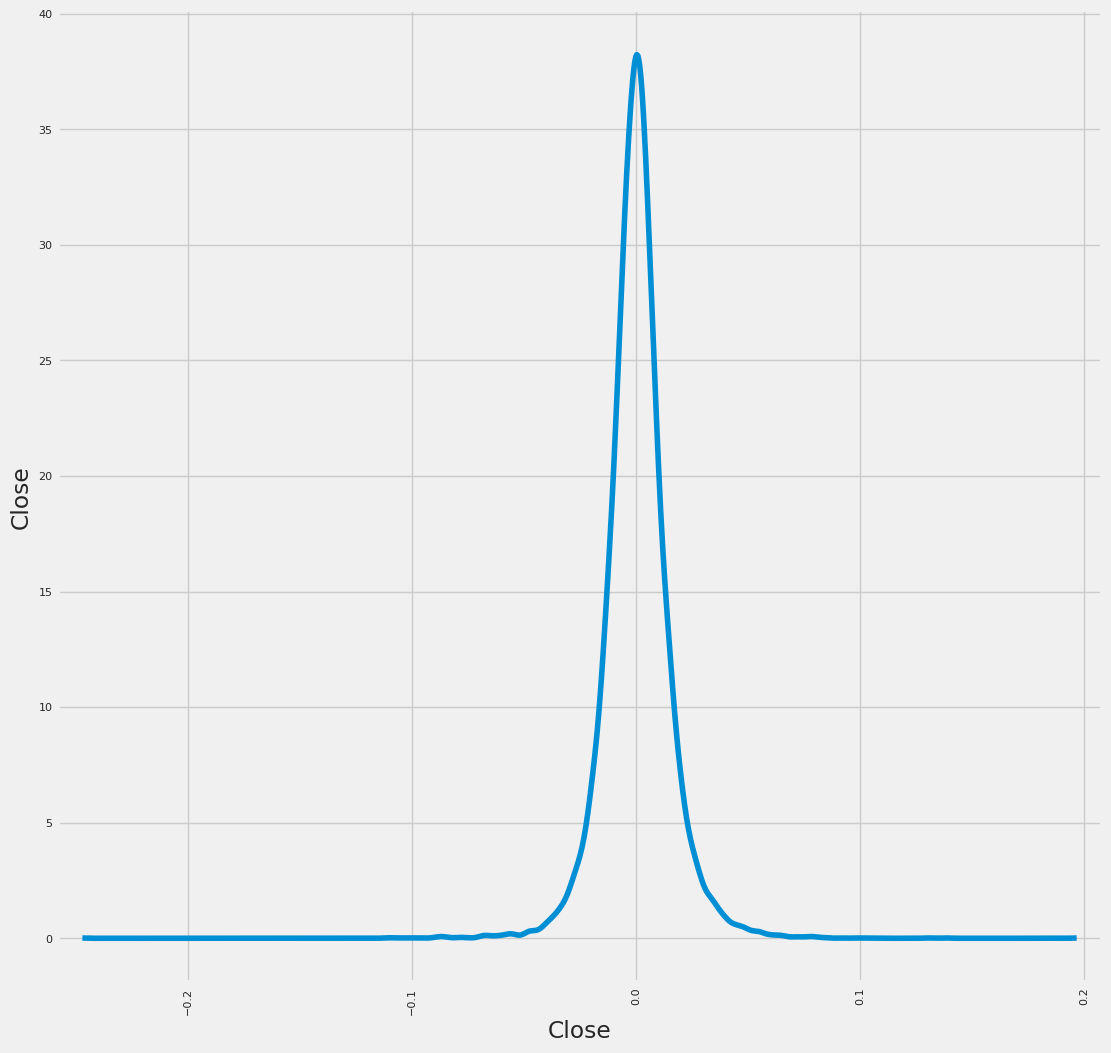

In [25]:
# Plot a scatter matrix with the `daily_pct_change` data
# KDE gives a smooth curve that represents the distribution of data points.
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde',
alpha=0.1,figsize=(12,12))
# Show the plot
plt.show()

In [26]:
import plotly.graph_objects as go
KO_Data=KO_Data.reset_index()
fig = go.Figure(data=go.Ohlc(x=KO_Data['Date'],
open=KO_Data['Open'],
high=KO_Data['High'],
low=KO_Data['Low'],
close=KO_Data['Close']))
fig.show()

In [29]:
#KO_Data=KO_Data.reset_index()
KO_Data['SMA5'] = KO_Data.Close.rolling(5).mean()
KO_Data['SMA20'] = KO_Data.Close.rolling(20).mean()
KO_Data['SMA50'] = KO_Data.Close.rolling(50).mean()
KO_Data['SMA200'] = KO_Data.Close.rolling(200).mean()
KO_Data['SMA500'] = KO_Data.Close.rolling(500).mean()
fig = go.Figure(data=[go.Ohlc(x=KO_Data['Date'],open=KO_Data['Open'],
high=KO_Data['High'],low=KO_Data['Low'],close=KO_Data['Close'],
name = "OHLC"),
go.Scatter(x=KO_Data.Date,
y=KO_Data.SMA5, line=dict(color='orange', width=1),
name="SMA5"),
go.Scatter(x=KO_Data.Date,
y=KO_Data.SMA20, line=dict(color='green', width=1),
name="SMA20"),
go.Scatter(x=KO_Data.Date,
y=KO_Data.SMA50, line=dict(color='blue', width=1),
name="SMA50"),
go.Scatter(x=KO_Data.Date,
y=KO_Data.SMA200, line=dict(color='violet', width=1),
name="SMA200"),
go.Scatter(x=KO_Data.Date,
y=KO_Data.SMA500, line=dict(color='purple', width=1),
name="SMA500")])
fig.show()

In [31]:
KO_Data.head()
#KO_Data.fillna(0)
#KO_Data.set_index('Date')

level_0  index        Date      Open      High       Low     Close  \
0        0      0  1962-01-02  0.050016  0.051378  0.050016  0.050016   
1        1      1  1962-01-03  0.049273  0.049273  0.048159  0.048902   
2        2      2  1962-01-04  0.049026  0.049645  0.049026  0.049273   
3        3      3  1962-01-05  0.049273  0.049892  0.048035  0.048159   
4        4      4  1962-01-08  0.047787  0.047787  0.046735  0.047664   

    Volume  Dividends  Stock Splits  ...      SMA5  SMA20  SMA50  SMA200  \
0   806400        0.0             0  ...       NaN    NaN    NaN     NaN   
1  1574400        0.0             0  ...       NaN    NaN    NaN     NaN   
2   844800        0.0             0  ...       NaN    NaN    NaN     NaN   
3  1420800        0.0             0  ...       NaN    NaN    NaN     NaN   
4  2035200        0.0             0  ...  0.048803    NaN    NaN     NaN   

   SMA500      EMA5     EMA20     EMA50    EMA200    EMA500  
0     NaN  0.050016  0.050016  0.050016  0.050016  0.050016  
1     NaN  0.049644  0.049910  0.049972  0.050005  0.050011  
2     NaN  0.049521  0.049849  0.049945  0.049998  0.050009  
3     NaN  0.049067  0.049688  0.049875  0.049979  0.050001  
4     NaN  0.048599  0.049495  0.049788  0.049956  0.049992  

[5 rows x 22 columns]

In [33]:
try:
  from finta import TA
  from backtesting import Backtest, Strategy
  from backtesting.lib import crossover
except:
  !pip install finta backtesting
  from finta import TA
  from backtesting import Backtest, Strategy
  from backtesting.lib import crossover

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 8.2 MB/s eta 0:00:00


In [36]:
fin_ma = pd.read_csv('/content/Coca-Cola_stock_history (1).csv', parse_dates=True)
print(fin_ma.head())
ohlc=fin_ma
print(TA.SMA(ohlc, 42))
#ohlc.index = ohlc[index].dt.date

         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
15306    58.759467
15307    58.572686
15308    58.422110
15309    58.297065
15310    58.219369
Name: 42 period SMA, Length: 15311, dtype: float64


In [39]:
class DemaCross(Strategy):
  def init(self):
    self.ma1 = self.I(TA.DEMA, ohlc, 10)
    self.ma2 = self.I(TA.DEMA, ohlc, 20)
  def next(self):
    if crossover(self.ma1, self.ma2):
      self.buy()
    elif crossover(self.ma2, self.ma1):
      self.sell()



In [40]:
ohlc.head()
print(ohlc.Date)

0                       1962-01-02
1                       1962-01-03
2                       1962-01-04
3                       1962-01-05
4                       1962-01-08
                   ...            
15306    2022-10-20 00:00:00-04:00
15307    2022-10-21 00:00:00-04:00
15308    2022-10-24 00:00:00-04:00
15309    2022-10-25 00:00:00-04:00
15310    2022-10-26 00:00:00-04:00
Name: Date, Length: 15311, dtype: object


In [42]:
bt = Backtest(ohlc, DemaCross, cash=100000, commission=0.015, exclusive_orders=True)

In [43]:
bt.run()

Backtest.run:   0%|          | 0/15310 [00:00<?, ?bar/s]

Start                                     0.0
End                                   15310.0
Duration                              15310.0
Exposure Time [%]                    26.88263
Equity Final [$]                      0.19041
Equity Peak [$]                      100000.0
Commissions [$]                   77449.51548
Return [%]                          -99.99981
Buy & Hold Return [%]            118642.19364
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Alpha [%]                           -88.72432
Beta                                  -0.0001
Max. Drawdown [%]                   -99.99981
Avg. Drawdown [%]                   -99.99981
Max. Drawdown Duration                15304.0
Avg. Drawdown Duration                15304.0
# Trades                                362.0
Win Rate [%]                         12.43094
Best Trade [%]                        45.6298
Worst Trade [%]                     -17.64692
Avg. Trade [%]                       -3.79272
Max. Trade Duration                      59.0
Avg. Trade Duration                  11.35635
Profit Factor                         0.15259
Expectancy [%]                       -3.68244
SQN                                   -5.3684
Kelly Criterion                      -1.02421
_strategy                           DemaCross
_equity_curve                          Equ...
_trades                           Size  En...
dtype: object

In [44]:
bt.plot()


GridPlot(id='p1325', ...)